# Task 4.10: Part 1

## This script contains:
### 1. Importing Libraries & Data
### 2. Part 1 Q 5-10 of Task 4.10

## 1. Importing Libraries & Data

### Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Data

In [2]:
# Create path
path = r'C:\Users\M de Villiers\Desktop\Data Analytics\Acheivement 4\InstaCart_Basket_Analysis_10_01_2022'

In [3]:
# Import dataframe
final_df = pd.read_pickle(os.path.join(path, '02_Data', '02_Prepared_Data', 'orders_products_customers_excl.pkl'))

In [4]:
final_df.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,busiest_day,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,order_frequency,frequency_flag,region,exclusion_flag
0,26711,Female,Missouri,48,2017-01-01,3,married,165665,196,Soda,...,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
1,26711,Female,Missouri,48,2017-01-01,3,married,165665,196,Soda,...,Regularly busy,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
2,26711,Female,Missouri,48,2017-01-01,3,married,165665,196,Soda,...,Busiest days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
3,26711,Female,Missouri,48,2017-01-01,3,married,165665,6184,Clementines,...,Regularly busy,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include
4,26711,Female,Missouri,48,2017-01-01,3,married,165665,6184,Clementines,...,Least busy days,Most Orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,Include


In [5]:
final_df.shape

(30964564, 29)

## Part 1

## Question 5: Create Customer Profiles

In [6]:
# Check n_dependants values:
final_df['n_dependants'].value_counts()

3    7772516
0    7739681
2    7733261
1    7719106
Name: n_dependants, dtype: int64

In [7]:
# Check age values:
final_df['age'].value_counts()

79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: age, Length: 64, dtype: int64

In [8]:
# Check income variable:
final_df.agg({'income': ['max', 'min']})

,income
max,593901
min,25903


In [9]:
# Creating Customer Profiles: High-income young families.
# 'high income' means salaries over 270 000 (according to research upper middle-class is when a person earns between 100 000 and 370 000 - I wanted to choose something almost in the middle of that to split 'upper' and 'middle');
# 'young' means ages 18 to 40;
# 'families' refer to either married customers or customers with dependants
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <= 40) & (final_df['income'] > 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '18', '19', '16'])) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([0, 1, 2, 3])), 'customer_profile'] = 'High Income Young Family'

In [10]:
# Creating Customer Profiles: Low-income young families.
# 'low income' means salaries less than 270000;
# 'young' means ages 18 to 40;
# 'families' refer to either married customers or customers with dependants
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <= 40) & (final_df['income'] <= 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '18', '19', '16'])) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([0, 1, 2, 3])), 'customer_profile'] = 'Low Income Young Family'

In [11]:
# Creating Customer Profiles: Low-income families.
# 'low income' means salaries less than 270000;
# 'families' refer to either married customers or customers with dependants
final_df.loc[(final_df['age'] > 40) & (final_df['age'] <= 64) & (final_df['income'] <= 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '18', '19', '16', '17'])) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'Low Income Family'

In [12]:
# Creating Customer Profiles: High-income families.
# 'high income' means salaries above 270000;
# 'families' refer to either married customers or customers with dependants
final_df.loc[(final_df['age'] > 40) & (final_df['age'] <= 64) & (final_df['income'] > 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '17', '18', '19', '16'])) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'High Income Family'

In [13]:
# Creating Customer Profiles: High-income Pensioner families.
# 'high income' means salaries above 270000;
# 'pensioner' refers to people 65 and older;
# 'families' refer to either married customers or customers with dependants
final_df.loc[(final_df['age'] > 64) & (final_df['income'] > 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'High Income Pensioner Family'

In [14]:
# Creating Customer Profiles: low-income Pensioner families.
# 'low income' means salaries below 270000;
# 'pensioner' refers to people 65 and older;
# 'families' refer to either married customers or customers with dependants
final_df.loc[(final_df['age'] > 64) & (final_df['income'] <= 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'Low Income Pensioner Family'

In [15]:
# Creating Customer Profiles: Single High-income young adult.
# 'high income' means salaries over 270000;
# 'young' means ages 18 to 40;
# 'single' refers to either single or divorced/widowed with no dependants
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <= 40) & (final_df['income'] > 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'High Income Single Young Adult'

In [16]:
# Creating Customer Profiles: Low-income single young adult.
# 'low income' means salaries under 270000;
# 'young' means ages 18 to 40;
# 'single' refers to either single or divorced/widowed
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <= 40) & (final_df['income'] <= 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'Low Income Single Young Adult'

In [17]:
# Creating Customer Profiles: Low-income single adult.
# 'low income' means salaries under 270000;
# 'single' refers to either single or divorced/widowed
final_df.loc[(final_df['age'] > 40) & (final_df['age'] <= 64) & (final_df['income'] <= 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'Low Income Single Adult'

In [18]:
# Creating Customer Profiles: Single high-income adult.
# 'high income' means salaries above 270000;
# 'single' refers to either single or divorced/widowed
final_df.loc[(final_df['age'] > 40) & (final_df['age'] <= 64) & (final_df['income'] > 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'High Income Single Adult'

In [19]:
# Creating Customer Profiles: High-income Pensioner.
# 'high income' means salaries above 270000;
# 'pensioner' refers to people 65 and older;
final_df.loc[(final_df['age'] > 64) & (final_df['income'] >= 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'High Income Pensioner'

In [20]:
# Creating Customer Profiles: Low-income Pensioner.
# 'low income' means salaries below 270000;
# 'pensioner' refers to people 65 and older;
final_df.loc[(final_df['age'] > 64) & (final_df['income'] <= 270000) & (final_df['department_id'].isin(['1', '4', '5', '7', '19', '16'])) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'Low Income Pensioner'

In [21]:
# Check new variable
final_df['customer_profile'].value_counts(dropna = False)

NaN                               8678217
Low Income Family                 6400641
Low Income Young Family           6007494
Low Income Pensioner Family       4332820
Low Income Single Adult           2059981
Low Income Single Young Adult     1959141
Low Income Pensioner              1425227
High Income Family                  36373
High Income Pensioner Family        23795
High Income Single Adult            14548
High Income Young Family            13453
High Income Pensioner                7846
High Income Single Young Adult       5028
Name: customer_profile, dtype: int64

In [22]:
final_df[['user_id', 'customer_profile']].head(30)

,user_id,customer_profile
0,26711,Low Income Family
1,26711,Low Income Family
2,26711,Low Income Family
3,26711,Low Income Family
4,26711,Low Income Family
5,26711,Low Income Family
6,26711,Low Income Family
7,26711,Low Income Family
8,26711,Low Income Family
9,26711,Low Income Family


In [23]:
# transform all values in customer_profile column to be the same value for each user_id (a user_id cannot have 2 profiles)
final_df['customer_profile'] = final_df.groupby('user_id')['customer_profile'].transform('first')

In [24]:
# Check new variable
final_df['customer_profile'].value_counts(dropna = False)

Low Income Family                 8631666
Low Income Young Family           8346952
Low Income Pensioner Family       6136891
Low Income Single Adult           2915421
Low Income Single Young Adult     2771931
Low Income Pensioner              2010385
High Income Family                  51265
High Income Pensioner Family        36227
High Income Single Adult            21763
High Income Young Family            20443
High Income Pensioner               11484
High Income Single Young Adult       8101
NaN                                  2035
Name: customer_profile, dtype: int64

In [25]:
# create df of missing values
df_NaN = final_df[final_df['customer_profile'].isnull() == True]

In [26]:
df_NaN.groupby(['user_id'])['income'].transform(np.max).head(100)

299326     131987
299327     131987
299328     131987
299329     131987
299330     131987
            ...  
2288516    136143
2288517    136143
2288518    136143
2288519    136143
2288520    136143
Name: income, Length: 100, dtype: int64

In [27]:
df_NaN

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,avg_spending,spending_flag,order_frequency,frequency_flag,region,exclusion_flag,customer_profile
299326,25722,Male,Kentucky,65,2017-01-11,1,married,131987,7021,Organic Tomato Paste,...,Average Orders,6,New customer,7.228571,Low spender,26.0,Non-frequent customer,South,Include,None
299327,25722,Male,Kentucky,65,2017-01-11,1,married,131987,7021,Organic Tomato Paste,...,Average Orders,6,New customer,7.228571,Low spender,26.0,Non-frequent customer,South,Include,None
299328,25722,Male,Kentucky,65,2017-01-11,1,married,131987,9358,April Fresh Liquid Fabric Softener,...,Most Orders,6,New customer,7.228571,Low spender,26.0,Non-frequent customer,South,Include,None
299329,25722,Male,Kentucky,65,2017-01-11,1,married,131987,9358,April Fresh Liquid Fabric Softener,...,Average Orders,6,New customer,7.228571,Low spender,26.0,Non-frequent customer,South,Include,None
299330,25722,Male,Kentucky,65,2017-01-11,1,married,131987,9358,April Fresh Liquid Fabric Softener,...,Average Orders,6,New customer,7.228571,Low spender,26.0,Non-frequent customer,South,Include,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035316,115493,Female,North Dakota,49,2020-03-18,3,married,113015,18308,Non Fat Dry Milk Powder,...,Average Orders,5,New customer,12.350000,High spender,1.0,frequent customer,Midwest,Include,None
32035317,115493,Female,North Dakota,49,2020-03-18,3,married,113015,18308,Non Fat Dry Milk Powder,...,Most Orders,5,New customer,12.350000,High spender,1.0,frequent customer,Midwest,Include,None
32035318,115493,Female,North Dakota,49,2020-03-18,3,married,113015,31162,European Cookie Spread,...,Most Orders,5,New customer,12.350000,High spender,1.0,frequent customer,Midwest,Include,None
32035319,115493,Female,North Dakota,49,2020-03-18,3,married,113015,31162,European Cookie Spread,...,Most Orders,5,New customer,12.350000,High spender,1.0,frequent customer,Midwest,Include,None


In [28]:
# Trying new condition to profile rest of the customers: Low income family
final_df.loc[(final_df['age'] >40) & (final_df['age'] <= 64) & (final_df['income'] <= 270000) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'Low Income Family'

In [29]:
# Trying new condition to profile rest of the customers: Low income pensioner family
final_df.loc[(final_df['age'] > 64) & (final_df['income'] <= 270000) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'Low Income Pensioner Family'

In [30]:
# Trying new condition to profile rest of the customers: Young Low income family
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] <=40) & (final_df['income'] <= 270000) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'Low Income Young Family'

In [31]:
# Trying new condition to profile rest of the customers: High income family
final_df.loc[(final_df['age'] >40) & (final_df['age'] <= 64) & (final_df['income'] > 270000) & (final_df['fam_status'].isin(['married', 'living with parents and siblings'])) & (final_df['n_dependants'].isin([1, 2, 3])), 'customer_profile'] = 'High Income Family'

In [32]:
# Trying new condition to profile rest of the customers: Low income single adult
final_df.loc[(final_df['age'] >40) & (final_df['age'] <= 64) & (final_df['income'] <= 270000) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'Low Income Single Adult'

In [33]:
# Trying new condition to profile rest of the customers: Low income single Young adult
final_df.loc[(final_df['age'] >= 18) & (final_df['age'] < 41) & (final_df['income'] <= 270000) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'Low Income Single Young Adult'

In [34]:
# Trying new condition to profile rest of the customers: Low income pensioner
final_df.loc[(final_df['age'] > 64) & (final_df['income'] <= 270000) & (final_df['fam_status'].isin(['single', 'divorced/widowed'])) & (final_df['n_dependants'] == 0), 'customer_profile'] = 'Low Income Pensioner'

In [35]:
# Check new variable
final_df['customer_profile'].value_counts(dropna = False)

Low Income Family                 8631858
Low Income Young Family           8347731
Low Income Pensioner Family       6137359
Low Income Single Adult           2915701
Low Income Single Young Adult     2772158
Low Income Pensioner              2010474
High Income Family                  51265
High Income Pensioner Family        36227
High Income Single Adult            21763
High Income Young Family            20443
High Income Pensioner               11484
High Income Single Young Adult       8101
Name: customer_profile, dtype: int64

## Question 6: Visualise Customer Profile

In [36]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_theme(style="darkgrid")

In [37]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

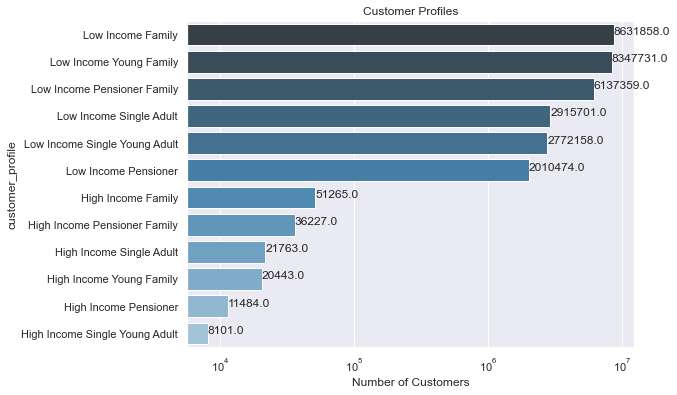

In [38]:
# Create horizontal bar plot
palette = sns.color_palette("Blues_d",n_colors=12)
palette.reverse()
bar_cust = sns.countplot(y="customer_profile", data = final_df, order = final_df['customer_profile'].value_counts().index, palette=palette ,)
bar_cust.set(xscale="log")
bar_cust.set_title('Customer Profiles')
bar_cust.set_xlabel('Number of Customers')
#show values on barplot
show_values(bar_cust, "h", space=0)

As can be seen from the visualisation, most customers are lower income families of all ages.

In [39]:
bar_cust.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'bar_customer_profile.png'))

## Question 7 Basic Analysis of Customer Profiles

In [40]:
# Aggregate usage total (number of last order = max order numer = total number of times customers has ordered from instacart)
cust_ord = final_df.groupby('customer_profile').agg({'order_number': ['mean', 'min', 'max']})

In [41]:
cust_ord

order_number        
                                       mean min max
customer_profile                                   
High Income Family                18.215586   1  99
High Income Pensioner             24.155695   1  99
High Income Pensioner Family      19.555718   1  85
High Income Single Adult          25.105500   1  99
High Income Single Young Adult    16.269473   1  53
High Income Young Family          18.865577   1  99
Low Income Family                 17.692464   1  99
Low Income Pensioner              17.799738   1  99
Low Income Pensioner Family       17.757736   1  99
Low Income Single Adult           18.226838   1  99
Low Income Single Young Adult     17.712950   1  99
Low Income Young Family           17.909711   1  99

In [42]:
cust_ord.to_clipboard()

In [43]:
# Aggregate usage frequency: How often do different customers order?
# min, max, mean of days_since_prior_order
custp_freq = final_df.groupby('customer_profile').agg({'days_since_prior_order': ['mean', 'min', 'max', 'median']})

In [44]:
custp_freq

days_since_prior_order                  
                                                 mean  min   max median
customer_profile                                                       
High Income Family                          10.075627  0.0  30.0    7.0
High Income Pensioner                        8.932950  0.0  30.0    7.0
High Income Pensioner Family                 9.910177  0.0  30.0    7.0
High Income Single Adult                     8.686670  0.0  30.0    6.0
High Income Single Young Adult              10.940871  0.0  30.0    8.0
High Income Young Family                    10.243653  0.0  30.0    7.0
Low Income Family                           10.275548  0.0  30.0    7.0
Low Income Pensioner                        10.198450  0.0  30.0    7.0
Low Income Pensioner Family                 10.219419  0.0  30.0    7.0
Low Income Single Adult                     10.145539  0.0  30.0    7.0
Low Income Single Young Adult               10.311272  0.0  30.0    7.0
Low Income Young Family                     10.209382  0.0  30.0    7.0

In [45]:
# copy to clipboard
custp_freq.to_clipboard()

It looks like high income pensioners and high income single adults order more frequently.

In [46]:
# Check prices max
final_df['prices'].max()

99999.0

In [47]:
# Change prices higher than 100 to NaN
final_df.loc[final_df['prices'] >100, 'prices'] = np.nan

In [48]:
# Check prices max
final_df['prices'].max()

25.0

In [49]:
# Aggregate Expenditure: What is the price of items ordered by specific customers?
# min, max, mean of prices
custp_price = final_df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max', 'median']})

In [50]:
custp_price

prices                  
                                    mean  min   max median
customer_profile                                          
High Income Family              7.765783  1.0  25.0    7.2
High Income Pensioner           7.733835  1.0  25.0    7.3
High Income Pensioner Family    7.793448  1.0  25.0    7.4
High Income Single Adult        7.897448  1.0  25.0    7.5
High Income Single Young Adult  7.796627  1.0  25.0    7.2
High Income Young Family        7.762175  1.0  25.0    7.2
Low Income Family               7.791575  1.0  25.0    7.4
Low Income Pensioner            7.802367  1.0  25.0    7.4
Low Income Pensioner Family     7.794999  1.0  25.0    7.4
Low Income Single Adult         7.789326  1.0  25.0    7.4
Low Income Single Young Adult   7.779857  1.0  25.0    7.4
Low Income Young Family         7.787502  1.0  25.0    7.4

In [51]:
# Copy to clipboard
custp_price.to_clipboard()

## Question 8: Crosstab of Customer Profile in different Regions

In [52]:
# Create crosstab to analyse customer profiles in different regions
crosstab_1 = pd.crosstab(final_df['customer_profile'], final_df['region'], dropna = False)

In [53]:
crosstab_1

region,Midwest,Northeast,South,West
customer_profile,,,,
High Income Family,15750,9603,12606,13306
High Income Pensioner,3177,3096,4147,1064
High Income Pensioner Family,9807,5159,12585,8676
High Income Single Adult,3831,3770,9432,4730
High Income Single Young Adult,4608,1622,1609,262
High Income Young Family,3984,2354,9300,4805
Low Income Family,2044336,1530419,2839116,2217987
Low Income Pensioner,466904,375743,653590,514237
Low Income Pensioner Family,1424158,1100809,2038139,1574253


In [48]:
crosstab_1.to_clipboard()

## Question 9: Further Analyses

### Customers organised by Frequency of Orders

Text(0.5, 0, 'Frequency Flag')

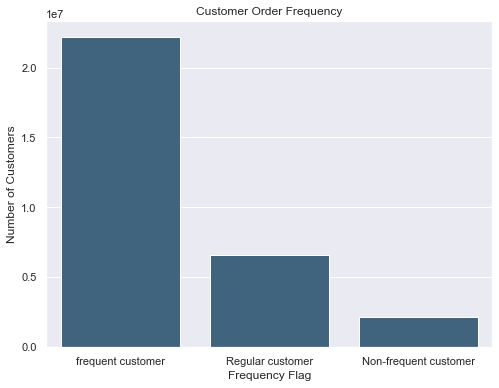

In [91]:
# Frequency flag bar
bar_freq = sns.countplot(x="frequency_flag", data = final_df, order = final_df['frequency_flag'].value_counts().index, color='#356689')
bar_freq.set_title('Customer Order Frequency')
bar_freq.set_ylabel('Number of Customers')
bar_freq.set_xlabel('Frequency Flag')

In [92]:
bar_freq.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'bar_freq.png'))

### Most popular departments

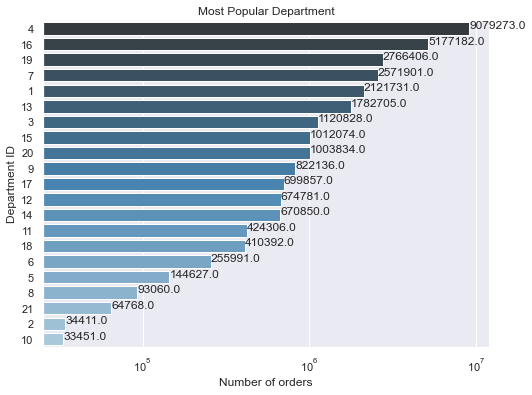

In [75]:
# Most popular department
palette = sns.color_palette("Blues_d",n_colors=21)
palette.reverse()
pop_dep = sns.countplot(y="department_id", data = final_df, order = final_df['department_id'].value_counts().index, palette = palette)
pop_dep.set(xscale="log")
pop_dep.set_title('Most Popular Department')
pop_dep.set_xlabel('Number of orders')
pop_dep.set_ylabel('Department ID')
#show values on barplot
show_values(pop_dep, "h", space=0)

In [76]:
# Save figure
pop_dep.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'pop_dep.png'))

### Analysis by Region: Loyalty &  Spending Habits

Text(0, 0.5, 'Region')

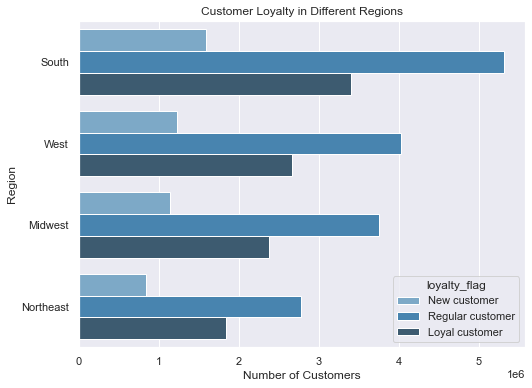

In [93]:
# Comparison of loyalty in different regions
loyalty_region = sns.countplot(y='region', data = final_df, order = final_df['region'].value_counts().index, hue = 'loyalty_flag', palette = 'Blues_d')
loyalty_region.set_title('Customer Loyalty in Different Regions')
loyalty_region.set_xlabel('Number of Customers')
loyalty_region.set_ylabel('Region')

In [94]:
# Save figure
loyalty_region.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'loyalty_per_region1.png'))

Text(10.625, 0.5, 'Region')

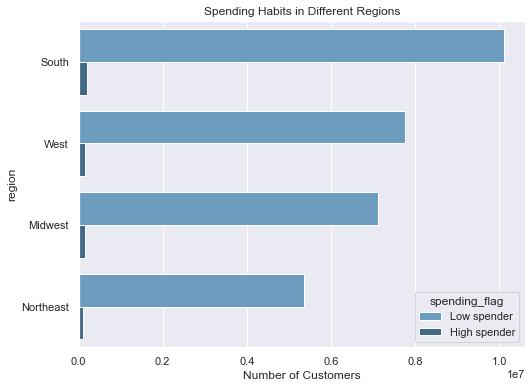

In [95]:
# Comparison of spending habits in different regions
spending_region = sns.countplot(y='region', data = final_df, order = final_df['region'].value_counts().index, hue = 'spending_flag', palette = 'Blues_d')
spending_region.set_title('Spending Habits in Different Regions')
spending_region.set_xlabel('Number of Customers')
loyalty_region.set_ylabel('Region')

In [96]:
# Save figure
spending_region.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'spending_per_region1.png'))

In [97]:
# Crosstab of spending per region
crosstab = pd.crosstab(final_df['region'], final_df['spending_flag'], dropna = False)

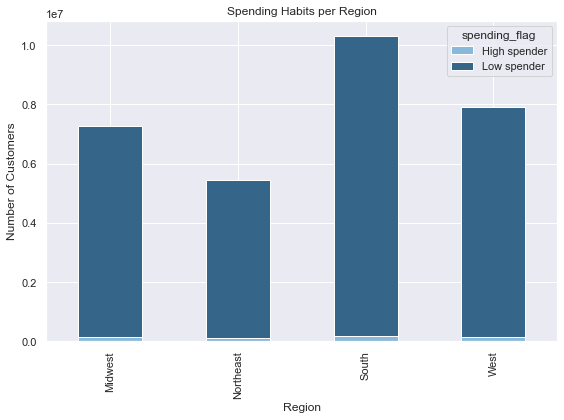

In [98]:
# Stacked bar of spending by region
xtab_stacked = crosstab.plot.bar(color =['#88b9da', '#356689'], title = 'Spending Habits per Region', xlabel= 'Region', ylabel= 'Number of Customers', stacked = True)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

In [99]:
# Save figure
xtab_stacked.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'spending_per_region_stacked.png'))

### Order Habits by Loyalty: Spending Habits; Frequency of Orders

In [43]:
# Spending habits based on loyalty
spending_xtab = pd.crosstab(final_df['loyalty_flag'], final_df['spending_flag'], dropna = False)

In [44]:
spending_xtab

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,216600,10067493
New customer,84011,4719684
Regular customer,302814,15573962


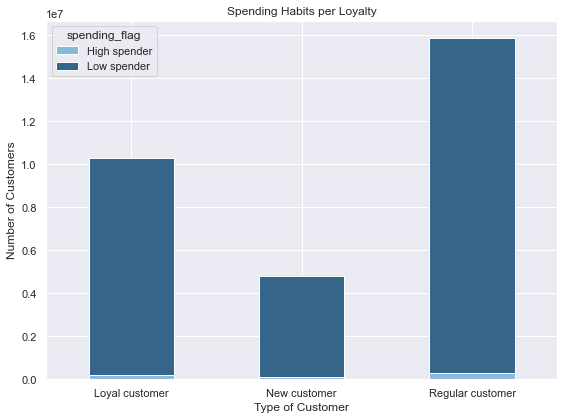

In [64]:
spending_xtab_stacked = spending_xtab.plot.bar(color =['#88b9da', '#356689'], title = 'Spending Habits per Loyalty', xlabel= 'Type of Customer', ylabel= 'Number of Customers', stacked = True)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

In [65]:
# Save figure
spending_xtab_stacked.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'spending_per_loyalty_stacked.png'))

In [47]:
# Order Frequency based on loyalty
frequency_loyalty_xtab = pd.crosstab(final_df['loyalty_flag'], final_df['frequency_flag'], dropna = False)

In [48]:
frequency_loyalty_xtab

frequency_flag,Non-frequent customer,Regular customer,frequent customer
loyalty_flag,,,
Loyal customer,0,2518,10281575
New customer,1526642,1616851,1660202
Regular customer,660775,4948884,10267117


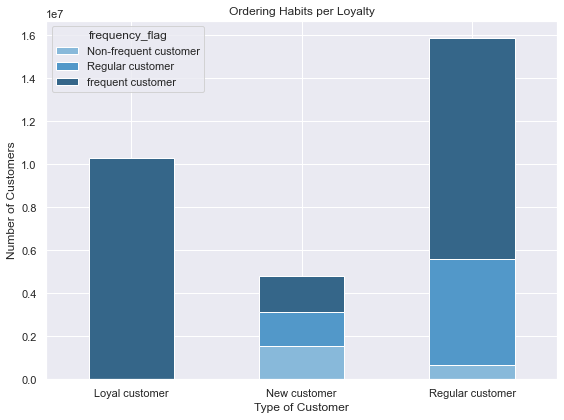

In [66]:
# Stacked bar of ordering habits by loyalty status
frequency_loy_xtab_stacked = frequency_loyalty_xtab.plot.bar(color =['#88b9da', '#5298c9', '#356689'], title = 'Ordering Habits per Loyalty', xlabel= 'Type of Customer', ylabel= 'Number of Customers', stacked = True)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

In [67]:
# Save figure
frequency_loy_xtab_stacked.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'order_freq_per_loyalty_stacked.png'))

### Order habits based on family status: Spending & Order Frequency

In [138]:
# spending habits based on family status
xtab_fam_spend = pd.crosstab(final_df1['fam_status'], final_df['spending_flag'], dropna = False)

In [139]:
xtab_fam_spend

spending_flag,High spender,Low spender
fam_status,,
divorced/widowed,50321,2594950
living with parents and siblings,27926,1453246
married,429457,21314254
single,95721,4998689


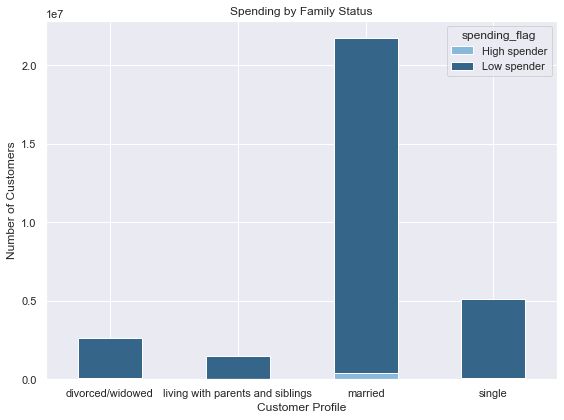

In [141]:
# Stacked Bar of spending habits by Family Status
fam_spend = xtab_fam_spend.plot.bar(color =['#88b9da', '#356689', '#344048'], title = 'Spending by Family Status', xlabel= 'Customer Profile', ylabel= 'Number of Customers', stacked = True)
plt.xticks(rotation= 0, ha='center')
plt.tight_layout()

In [142]:
# Save figure
fam_spend.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'fam_spend.png'))

Text(0.5, 0, 'Number of Customers')

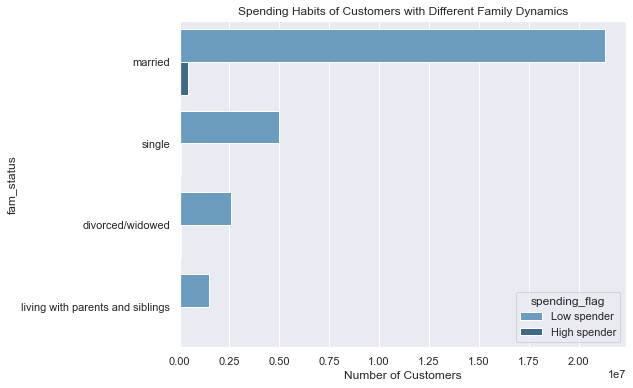

In [106]:
# Bar Chart of Spending per family status
spending_fam = sns.countplot(y='fam_status', data = final_df, order = final_df['fam_status'].value_counts().index, hue = 'spending_flag', palette = 'Blues_d')
spending_fam.set_title('Spending Habits of Customers with Different Family Dynamics')
spending_fam.set_xlabel('Number of Customers')

In [107]:
# Save figure
spending_fam.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'spending_per_fam_status.png'))

Text(0.5, 0, 'Number of Customers')

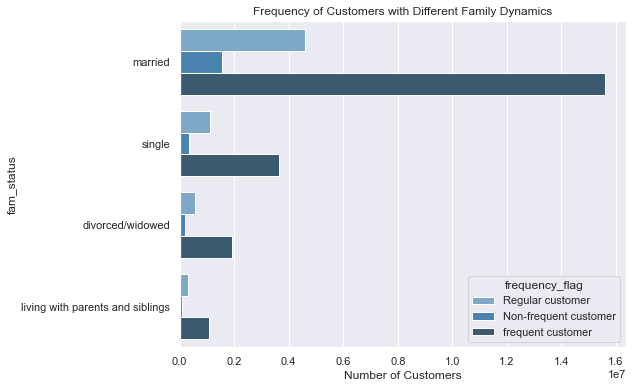

In [104]:
# Bar Chart of Frequency per family status
frequency_fam = sns.countplot(y='fam_status', data = final_df, order = final_df['fam_status'].value_counts().index, hue = 'frequency_flag', palette = 'Blues_d')
frequency_fam.set_title('Frequency of Customers with Different Family Dynamics')
frequency_fam.set_xlabel('Number of Customers')

In [105]:
# Save figure
frequency_fam.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'frequency_per_fam_status1.png'))

### Frequency of Orders in Different Regions

Text(0.5, 0, 'Number of Customers')

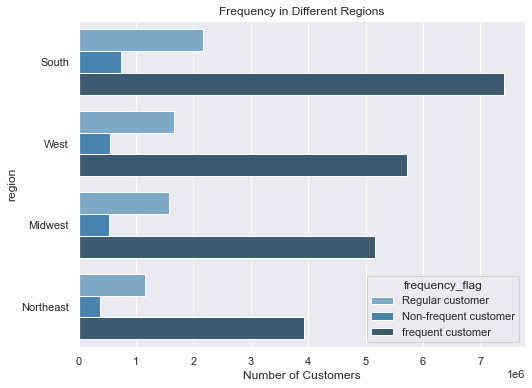

In [108]:
# Comparison of frequency in different regions
frequency_region = sns.countplot(y='region', data = final_df, order = final_df['region'].value_counts().index, hue = 'frequency_flag', palette = 'Blues_d')
frequency_region.set_title('Frequency in Different Regions')
frequency_region.set_xlabel('Number of Customers')

In [109]:
# Save figure
frequency_region.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'frequency_per_region.png'))

### Analysis of Customer Profiles

In [110]:
#spending habits of customers
xtab_cust_price = pd.crosstab(final_df['customer_profile'], final_df['price_range_loc'], dropna = False)

In [111]:
xtab_cust_price

price_range_loc,High-range Product,Low-range Product,Mid-range Product
customer_profile,,,
High Income Family,1250,15892,34123
High Income Pensioner,240,3592,7652
High Income Pensioner Family,787,11297,24143
High Income Single Adult,408,6562,14793
High Income Single Young Adult,184,2457,5460
High Income Young Family,604,6409,13430
Low Income Family,111121,2699714,5821023
Low Income Pensioner,26143,627913,1356418
Low Income Pensioner Family,79745,1916297,4141317


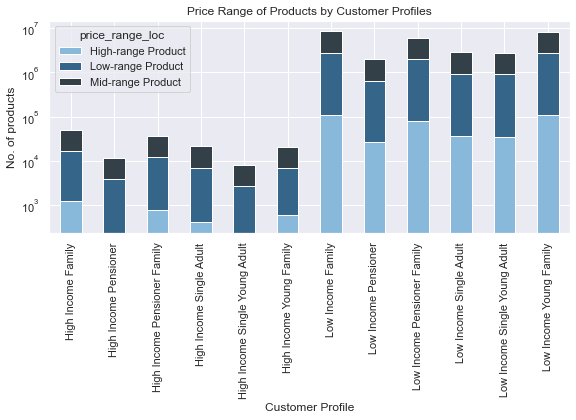

In [112]:
# Price range of items bought by different customer profiles
cust_price = xtab_cust_price.plot.bar(color =['#88b9da', '#356689', '#344048'], title = 'Price Range of Products by Customer Profiles', xlabel= 'Customer Profile', ylabel= 'No. of products', stacked = True)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.yscale("log")

In [113]:
cust_price.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'cust_price1.png'))

In [72]:
xtab_cust_price.to_clipboard()

In [114]:
# Crosstab for ordering frequency by customer profiles
xtab_cust_freq = pd.crosstab(final_df['customer_profile'], final_df['frequency_flag'], dropna = False)

In [115]:
xtab_cust_freq

frequency_flag,Non-frequent customer,Regular customer,frequent customer
customer_profile,,,
High Income Family,2728,10777,37760
High Income Pensioner,270,2006,9208
High Income Pensioner Family,842,8745,26640
High Income Single Adult,330,6030,15403
High Income Single Young Adult,552,1290,6259
High Income Young Family,684,4850,14909
Low Income Family,621935,1830640,6179283
Low Income Pensioner,142384,421953,1446137
Low Income Pensioner Family,430904,1293313,4413142


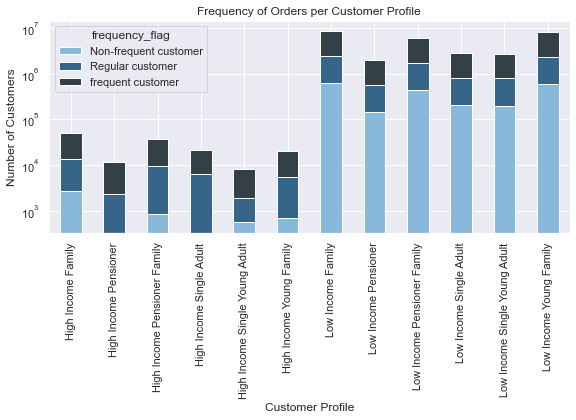

In [116]:
# Stacked bar chart of order frequenct bu customer profile
cust_frequency = xtab_cust_freq.plot.bar(color =['#88b9da', '#356689', '#344048'], title = 'Frequency of Orders per Customer Profile', xlabel= 'Customer Profile', ylabel= 'Number of Customers', stacked = True)
plt.xticks(rotation= 90, ha='center')
plt.tight_layout()
plt.yscale("log")

In [117]:
# Save Figure
cust_frequency.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'cust_frequency.png'))

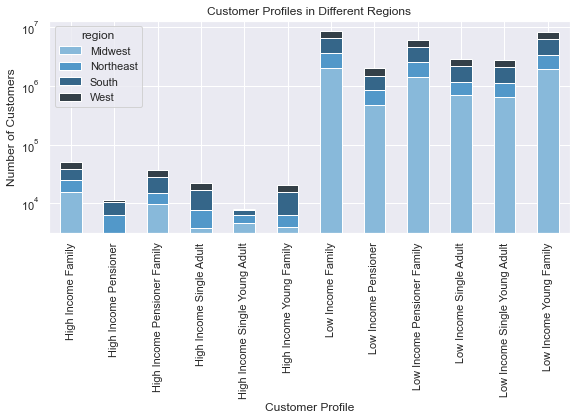

In [56]:
# Create stacked bar chart of crosstab_1 (Question 8)
region_cust_profile = crosstab_1.plot.bar(color =['#88b9da', '#5298c9', '#356689', '#344048'], title = 'Customer Profiles in Different Regions', ylabel= 'Number of Customers', xlabel= 'Customer Profile', stacked = True)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.yscale("log")

In [57]:
# Save Figure
region_cust_profile.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'region_cust_profile.png'))

In [58]:
# Crosstab for ordering frequency by customer profiles
xtab_cust_spend = pd.crosstab(final_df['customer_profile'], final_df['spending_flag'], dropna = False)

In [59]:
xtab_cust_spend

spending_flag,High spender,Low spender
customer_profile,,
High Income Family,51265,0
High Income Pensioner,11484,0
High Income Pensioner Family,36227,0
High Income Single Adult,21763,0
High Income Single Young Adult,8101,0
High Income Young Family,20443,0
Low Income Family,127082,8504776
Low Income Pensioner,30184,1980290
Low Income Pensioner Family,78991,6058368


In [62]:
xtab_cust_spend.to_clipboard()

### Further Wrangling and Analyses

In [118]:
# Drop exclusion flag
final_df1 = final_df.drop(columns = ['exclusion_flag'])

In [119]:
#Create Age Range
final_df1.loc[(final_df1['age'] >=18) & (final_df1['age'] <=40), 'age_range'] = 'Young Adult'

In [120]:
final_df1.loc[(final_df1['age'] >40) & (final_df1['age'] <=64), 'age_range'] = 'Adult'

In [121]:
final_df1.loc[(final_df1['age'] >64), 'age_range'] = 'Pensioner'

In [122]:
# Check Age Range flag
final_df1[['user_id', 'age', 'age_range']]

,user_id,age,age_range
0,26711,48,Adult
1,26711,48,Adult
2,26711,48,Adult
3,26711,48,Adult
4,26711,48,Adult
...,...,...,...
32404813,135902,66,Pensioner
32404814,135902,66,Pensioner
32404815,135902,66,Pensioner
32404816,135902,66,Pensioner


### Analyses by Age

Text(0.5, 0, 'Number of Customers')

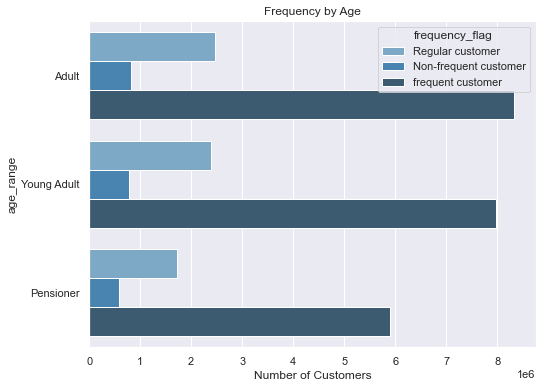

In [125]:
# Does Age influence frequency?
fre_age = sns.countplot(y='age_range', data = final_df1, order = final_df1['age_range'].value_counts().index, hue = 'frequency_flag', palette = 'Blues_d')
fre_age.set_title('Frequency by Age')
fre_age.set_xlabel('Number of Customers')

In [ ]:
# Save Figure
fre_age.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'fre_age.png'))

In [128]:
# Crosstab for spending by age
xtab_age_spend = pd.crosstab(final_df1['age_range'], final_df1['spending_flag'], dropna = False)

In [129]:
xtab_age_spend

spending_flag,High spender,Low spender
age_range,,
Adult,236195,11384392
Pensioner,156886,8038658
Young Adult,210344,10938089


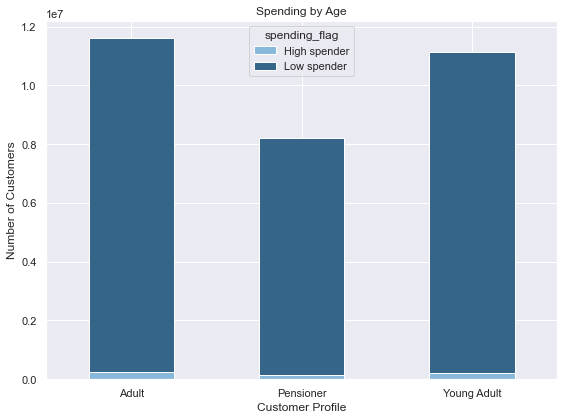

In [145]:
# Stacked Bar Chart of Spending by age
age_spend = xtab_age_spend.plot.bar(color =['#88b9da', '#356689', '#344048'], title = 'Spending by Age', xlabel= 'Customer Profile', ylabel= 'Number of Customers', stacked = True)
plt.xticks(rotation= 0, ha='center')
plt.tight_layout()

In [146]:
# Save figure
age_spend.figure.savefig(os.path.join(path, '04_Analysis','01_Visualisations', 'age_spend.png'))

### Question 10

In [96]:
#Export final df
final_df1.to_pickle(os.path.join(path, '02_Data', '02_Prepared_Data', 'Final Data Frame.pkl'))